# TP2 Ossan KASSEGNE : Classifieur Bayésien 

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from math import pi,exp,sqrt
from scipy.stats import multivariate_normal
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [102]:
iris = datasets.load_iris()
#print (iris.data)
#print(iris.target)

In [103]:
Ciris = np.c_[iris.data.reshape(len(iris.data), -1), iris.target.reshape(len(iris.target), -1)]
np.random.seed(987654321)
np.random.shuffle(Ciris)
shuffledIrisData = Ciris[ :, :iris.data.size//len(iris.data)].reshape(iris.data.shape)
shuffledIrisTarget = Ciris[ :, iris.data.size//len(iris.data) :].reshape(iris.target.shape)


# Création des corpus

In [104]:
trainData,devData,testData = shuffledIrisData[:100],shuffledIrisData[100:130],shuffledIrisData[130:]
trainTarget,devTarget,testTarget = shuffledIrisTarget[:100],shuffledIrisTarget[100:130],shuffledIrisTarget[130:]


# Phase d'apprentissage (utilisation de sepal length et sepal width/ colonnes 0 et 1)


### Probabilité à priori sur le modèle d'apprentissatige
- On récupère la probabilité à priori de chaque classe dans le corpus d'apprentissage
- Probabilités à priori
 Classe 0 =  0.32 
 Classe 1 =  0.37 
 Classe 2 =  0.31

In [105]:
##On récupère le nombre de classes 0,1 et 2
total = trainTarget.size
classes = list(trainTarget)
proba_class0 = (classes.count(0))/total
proba_class1 = (classes.count(1))/total
proba_class2 = (classes.count(2))/total
print("Probabilités à priori\n","Classe 0 = ",proba_class0,"\n","Classe 1 = ",proba_class1,"\n","Classe 2 = ",proba_class2)

Probabilités à priori
 Classe 0 =  0.32 
 Classe 1 =  0.37 
 Classe 2 =  0.31


### Séparation du corpus d'apprentissage en fonction des classes
 On sépare les corpus d'apprentissage en fonction des 3 classes pour le calcul des moyennes et des matrices de covariance de chacune

In [106]:
trainFull = np.c_[trainData,trainTarget]
train0,train1,train2 = [] ,[], []
for i in range(0,100):
    if(trainFull[i][4] == 0):
        train0.append(trainFull[i])
    elif (trainFull[i][4] == 1):
        train1.append(trainFull[i])
    else :
        train2.append(trainFull[i])
train0 = np.array(train0)
train1 = np.array(train1)
train2 = np.array(train2)


### Moyennes, Sigma suivant le descripteur "sepal length" et "sepal width" en fonction des classes
On calcule le vecteur des moyennes et la matrices de covariance de chaque classe

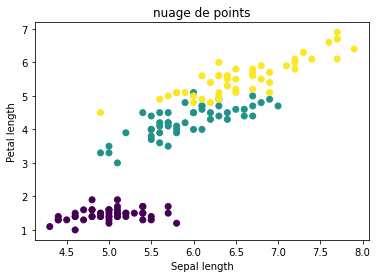

In [130]:
# sp = sepal length , sw = sepal width
def nuage(x1, x2, y, dim1='dim1', dim2='dim2'):
    plt.scatter(x1, x2, c=y)
    plt.title('nuage de points')
    plt.xlabel(dim1)
    plt.ylabel(dim2)
    plt.show()

D = iris.data
label = iris.target
dim = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
nuage(D[:,0], D[:,2], label, dim[0], dim[2])    

def moy(corpus, col1,col2):    #Retourne le vecteur des moyennes d'un corpus
    return np.r_[np.mean(corpus[:,col1]),np.mean(corpus[:,col2])]

def sigma(corpus,col1,col2):  #Retourne la matrice de covariance des colonnes d'un corpus
    return np.cov(corpus[:,col1],corpus[:,col2],ddof = 0)

M0 =moy(train0,0,1)
M1 =moy(train1,0,1)
M2 =moy(train2,0,1)

S0 = sigma(train0,0,1)
S1 = sigma(train1,0,1)
S2 = sigma(train2,0,1)

# Phase de classification
- On cherche la vraissemblance qui est le résultat de la fonction de densité de probabilité pour une loi Gaussienne bidimensionnelle, en utilisant les vecteurs moyennes et matrices de covariances précedemment obtenues et le paramètre X qui est un vecteur contenant les valeurs colonnes 0 et 1 de la donnée à classer.
- On calcule la probabilité à postériori = probabilité à priori * vraissemblance
- On classe les données  en sélectionnant la classe qui a la probabilité la plus élevée.
- On récupère ensuite le nombre d'erreurs en comparant les classes obtenues à les classes réelles.
- On teste ensuite différentes combinaisons de colonnes sur le corpus de dev (création de modèles à partir du corpus d'apprentissage) 
- On sélection le modèle qui a le moins d'erreurs

En utilisant les descripteurs des colonnes 1 et 0  on a  13.333333333333334 % d'erreur(s)


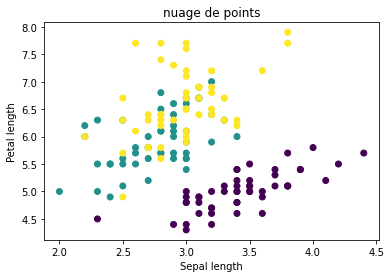

En utilisant les descripteurs des colonnes 2 et 0  on a  3.3333333333333335 % d'erreur(s)


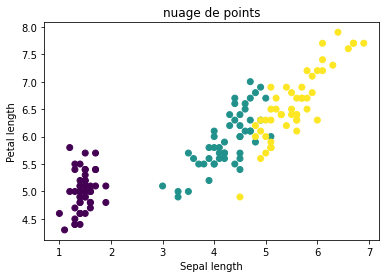

En utilisant les descripteurs des colonnes 2 et 1  on a  13.333333333333334 % d'erreur(s)


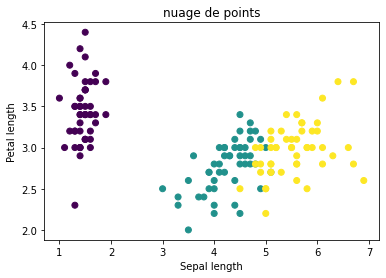

En utilisant les descripteurs des colonnes 3 et 0  on a  10.0 % d'erreur(s)


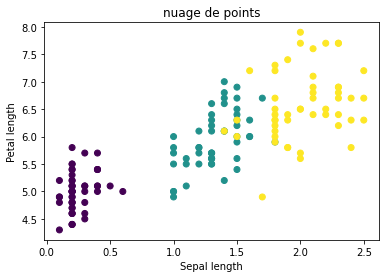

En utilisant les descripteurs des colonnes 3 et 1  on a  13.333333333333334 % d'erreur(s)


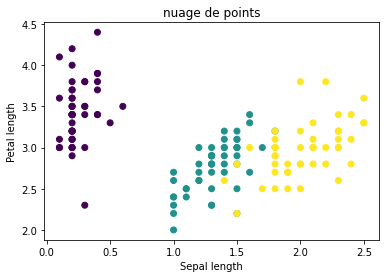

En utilisant les descripteurs des colonnes 3 et 2  on a  10.0 % d'erreur(s)


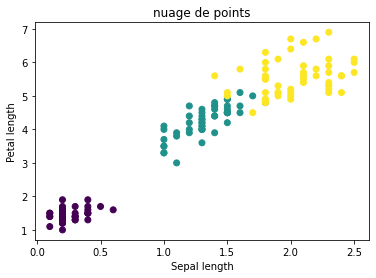

In [131]:
def posteriori(X,M0,M1,M2,S0,S1,S2,P0,P1,P2):  #Calcul des probabilités à postériori avec gaussienne multidimensionnelle
    p0 = P0*multivariate_normal.pdf(X,M0,S0)
    p1 = P1*multivariate_normal.pdf(X,M1,S1)
    p2 = P2*multivariate_normal.pdf(X,M2,S2)
    return np.c_[p0,p1,p2]

def classer(post):  # Classement par choix de la proba à posteriori la plus élevé
    classes = []
    a = post[:,0].size
    for i in range(0,a):
        liste = list(post[i])
        classes.append(liste.index(max(liste)))
    return np.array(classes)

def erreur(origine,pred): # On vérifie le nombres d'erreurs de prédictions
    total = origine.size
    erreur = 0
    for i in range(0,total):
        if(origine[i]!=pred[i]):
            erreur+=1
    return erreur/total
            
def affichErreur(col1,col2,erreur):
    print("En utilisant les descripteurs des colonnes",col1,"et",col2," on a ",erreur,"% d'erreur(s)")

def action(col1,col2,data,target):    #Fait le calcul de moyennes, sigmas en fonction des colonnes, calcul probaPosteriori,
    M0 =moy(train0,col1,col2)                       #classement puis erreur(s), retourne les classes  
    M1 =moy(train1,col1,col2)
    M2 =moy(train2,col1,col2)
    S0 = sigma(train0,col1,col2)
    S1 = sigma(train1,col1,col2)
    S2 = sigma(train2,col1,col2)
    probaPosteriori = posteriori(data[:,[col1,col2]],M0,M1,M2,S0,S1,S2,proba_class0,proba_class1,proba_class2)# calcul des probabilités à posteriori
    classement = classer(probaPosteriori) # classer corpus de dev avec variables de colonnes col1 et col2
    erreurs = erreur(target,classement) #nombre d'erreurs avec variables de colonnes col1 et col2
    affichErreur(col1,col2,100*erreurs)
    return classement



for i in range(0,4):      #On calcul le nombre d'erreurs pour toutes les combinaisons de colonnes 6 possibles 
    for j in range(0,4):
        if(i>j):
            action(i,j,devData,devTarget) #question sur l'ordre
            nuage(D[:,i], D[:,j], label, dim[0], dim[2])  #affichage des données en fonction de 2 d

# Phase de test


### En prenant les colonnes 0 et 2 pour notre modèle, on a le moins d'erreur(s) on poursuit le test avec ce modèle
 - On récupère les 3 moyennes et les 3 matrices de covariances obtenues à partir des descripteurs (colonnes 0 et 1) sur le corpus d'apprentissage.
 - On calcule la probabilité à postériori sur les 3 classes avec les paramètres et les deux premières colonnes du corpus de test.
 - On classe les données en sélectionnant la classe qui a la probabilité la plus élevée.

In [109]:
prediction = action(0,2,testData,testTarget)

En utilisant les descripteurs des colonnes 0 et 2  on a  5.0 % d'erreur(s)


# Matrice de confusion

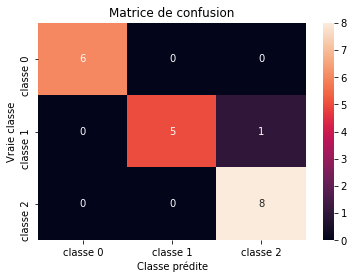

Text(0.5, 1.0, 'Matrice de confusion normalisée')

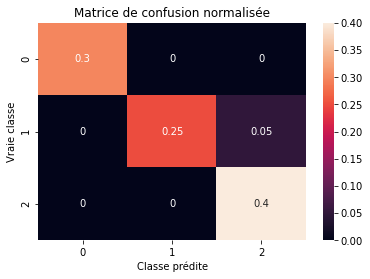

In [129]:
ax= plt.subplot()
matrice = confusion_matrix (testTarget,prediction)
matrice2 = matrice / (testTarget.size)
sns.heatmap(matrice, annot=True, ax = ax)
ax.set_xlabel('Classe prédite')
ax.set_ylabel('Vraie classe')
ax.set_title('Matrice de confusion')
ax.xaxis.set_ticklabels(['classe 0', 'classe 1', 'classe 2'])
ax.yaxis.set_ticklabels(['classe 0', 'classe 1', 'classe 2'])

plt.show()
sns.heatmap(matrice2, annot=True, ax = ax1)
plt.xlabel('Classe prédite')
plt.ylabel('Vraie classe')
plt.title('Matrice de confusion normalisée')
